<a href="https://colab.research.google.com/github/d4rk-rid3r/TIA-JORGE-MENSAL/blob/main/TIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame Qualitativos:



,Assunto,Autor,Grupo de Noticias,frequencia
0,Tecnologia,Leonardo,G1,20
1,Ciência,Maria,Folha,17
2,Política,João,Estadão,20
3,Religião,Ana,BBC,6
4,Cinema,Carlos,CNN,16
5,Música,Julia,El País,16
6,Esportes,Ricardo,The Guardian,1
7,Educação,Fernanda,R7,19
8,Saúde,Pedro,Globo News,4
9,Jogos,Beatriz,Reuters,18





DataFrame Quantitativos:



,data,Interações,Postagens
0,2023-10-01,120,97
1,2023-10-02,80,167
2,2023-10-03,90,117
3,2023-10-04,30,153
4,2023-10-05,70,59
5,2023-10-06,50,71
6,2023-10-07,110,86
7,2023-10-08,60,137
8,2023-10-09,90,120
9,2023-10-10,40,138


<ipython-input-65-4bdd1ed803cd>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_qualitativos, x='Assunto', y='frequencia', palette='viridis')


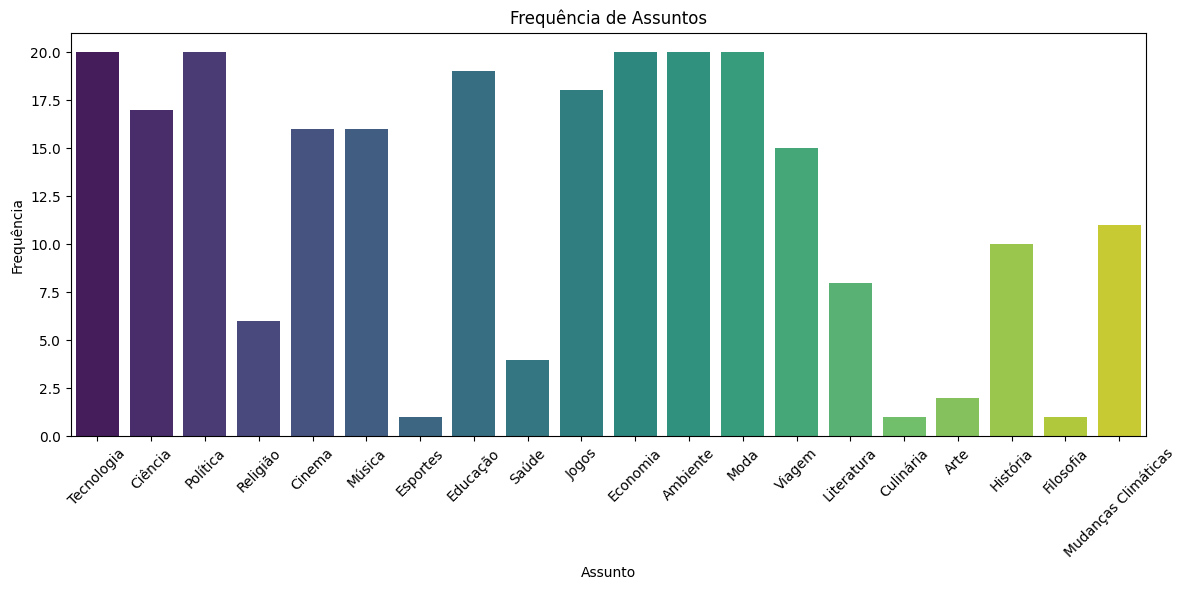

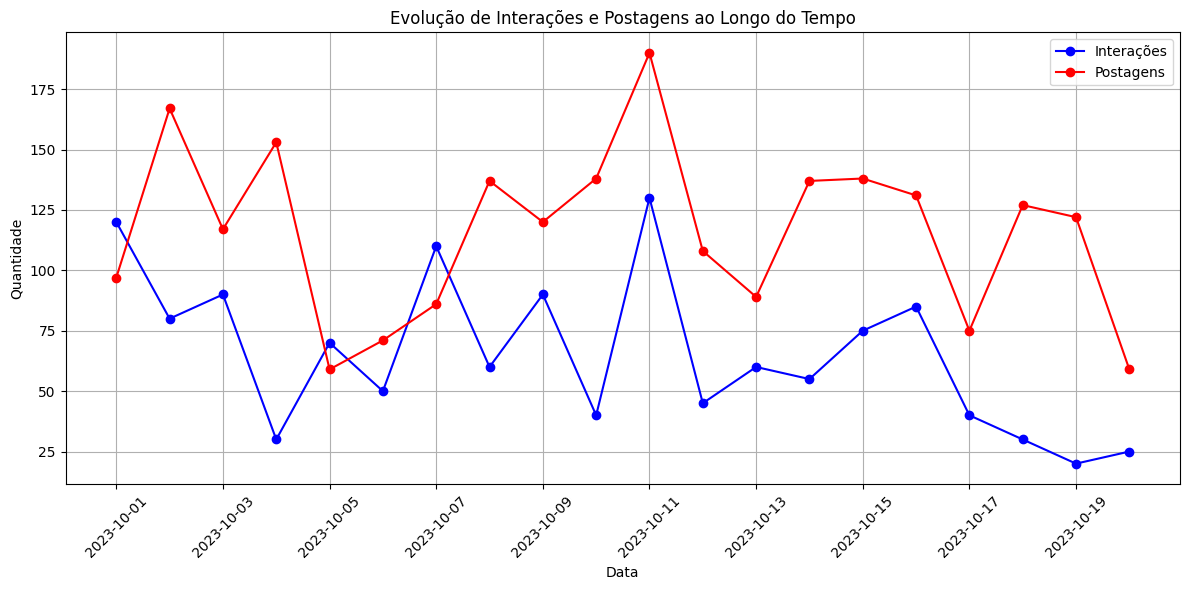

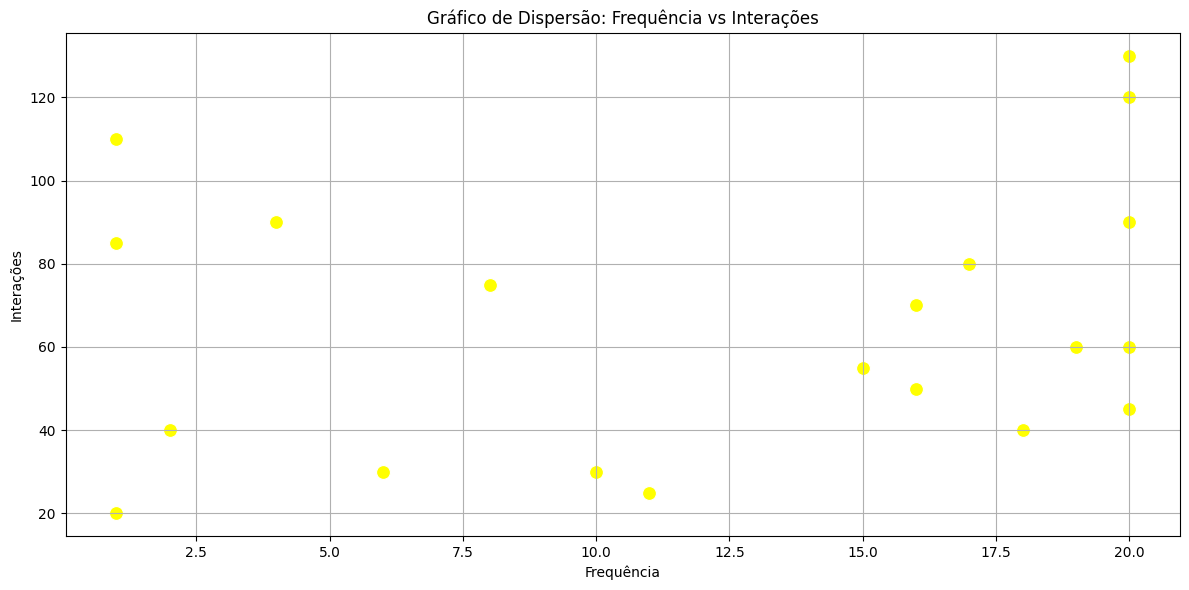

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np


dataset = {
    'Assunto': ['Tecnologia', 'Ciência', 'Política', 'Religião', 'Cinema',
                'Música', 'Esportes', 'Educação', 'Saúde', 'Jogos',
                'Economia', 'Ambiente', 'Moda', 'Viagem',
                'Literatura', 'Culinária', 'Arte', 'História', 'Filosofia', 'Mudanças Climáticas'],

    'Autor': ['Leonardo', 'Maria', 'João', 'Ana', 'Carlos',
              'Julia', 'Ricardo', 'Fernanda', 'Pedro', 'Beatriz',
              'Gabriel', 'Laura', 'Daniel', 'Sofia', 'Lucas',
              'Mariana', 'Paulo', 'Alice', 'Felipe', 'Roberta'],

    'Grupo de Noticias': ['G1', 'Folha', 'Estadão', 'BBC', 'CNN',
                         'El País', 'The Guardian', 'R7', 'Globo News', 'Reuters',
                         'NY Times', 'Le Monde', 'Al Jazeera', 'DW', 'UOL',
                         'O Globo', 'Jornal do Brasil', 'Correio Braziliense',
                         'Zero Hora', 'Valor Econômico'],

    'Interações': [120, 80, 90, 30, 70, 50, 110, 60, 90, 40,
                   130, 45, 60, 55, 75, 85, 40, 30, 20, 25],

    'data': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
             '2023-10-06', '2023-10-07', '2023-10-08', '2023-10-09', '2023-10-10',
             '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
             '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20'],

    'frequencia': np.random.randint(1, 21, size=20)  # Frequências aleatórias de 1 a 20
}


df = pd.DataFrame(dataset)
np.random.seed(0)  # Para reprodutibilidade
df['Postagens'] = np.random.randint(50, 201, size=len(df))

# DataFrames qualitativos e quantitativos
df_qualitativos = df[['Assunto', 'Autor', 'Grupo de Noticias', 'frequencia']].copy()
df_quantitativos = df[['data', 'Interações', 'Postagens']].copy()

# Converter a coluna 'data' para datetime no DataFrame quantitativos
df_quantitativos['data'] = pd.to_datetime(df_quantitativos['data'])


print("DataFrame Qualitativos:")
print('')
display(df_qualitativos)
print('')
print('')
print('')
print("DataFrame Quantitativos:")
print('')
display(df_quantitativos)
print('')
print('')
print('')
# Gráfico de Barras para Frequência de Assuntos
plt.figure(figsize=(12, 6))
sns.barplot(data=df_qualitativos, x='Assunto', y='frequencia', palette='viridis')
plt.title('Frequência de Assuntos')
plt.xlabel('Assunto')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('')
print('')
print('')
print('')

plt.figure(figsize=(12, 6))
plt.plot(df_quantitativos['data'], df_quantitativos['Interações'], marker='o', label='Interações', color='b')
plt.plot(df_quantitativos['data'], df_quantitativos['Postagens'], marker='o', label='Postagens', color='r')

# Configurações do gráfico
plt.title('Evolução de Interações e Postagens ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


print('')
print('')
print('')
print('')

# Gráfico de Dispersão entre Frequência e Interações
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='frequencia', y='Interações', color='orange', s=100)
plt.title('Gráfico de Dispersão: Frequência vs Interações')
plt.xlabel('Frequência')
plt.ylabel('Interações')
plt.grid(True)
plt.tight_layout()
plt.show()


###O 20 Newsgroups Dataset é um conjunto de dados de texto composto por postagens de grupos de discussão da Usenet, organizadas em 20 diferentes categorias ou grupos de notícias. Esses grupos abrangem uma ampla gama de tópicos, desde tecnologia e ciência até esportes, política e religião.
###Este dataset foi criado para representar discussões online públicas de várias comunidades sobre temas específicos, divididos em categorias temáticas. Cada documento no conjunto é uma postagem em um desses grupos, e o objetivo é usar esses textos para realizar tarefas de aprendizado de máquina, como classificação de texto, onde o modelo aprende a identificar a qual categoria (grupo de notícias) uma nova postagem pertence.
###O 20 Newsgroups Dataset busca representar a diversidade de tópicos e estilos de escrita presentes em discussões online, permitindo que pesquisadores e desenvolvedores testem algoritmos de PLN em problemas de classificação de texto. A tarefa principal é treinar modelos que possam distinguir entre textos de diferentes tópicos e aprender as características que diferenciam.
###Resumindo, 20 Newsgroups Dataset é uma representação de textos categorizados por tópicos variados, sendo uma ferramenta de testes de avaliação de sistemas que tratam de análise e classificação de grandes volumes de texto.
# ESTRUTURA

###Textos de postagens: O conteúdo principal das postagens feitas nos grupos de discussão da Usenet.
###Metadados: Informações adicionais associadas às postagens, como:
###⦁	Assunto: O título ou tópico da discussão.
###⦁	Autor: O remetente da mensagem (endereço de e-mail).
###⦁	Data: A data e hora em que a postagem foi feita.
###⦁	Grupo de Notícias: O grupo específico da Usenet ao qual a postagem pertence, representando uma das 20 categorias.
###Dados utilizados para tarefas de classificação de texto, análise de tópicos, entre outras.

# EXEMPLOS DE VARIAVEIS QUALITATIVOS

###⦁	Grupo de Notícias: Categoria à qual a postagem pertence (e.g., rec.sport.baseball, sci.med).
###⦁	Assunto: O título ou tema da postagem (e.g., “How to configure X server”).
###⦁	Autor: O remetente ou e-mail associado à postagem (e.g., johndoe@example.com).

# EXEMPLOS DE VARIAVEIS QUANTITATIVAS

###⦁	Comprimento do Texto: O número de caracteres ou palavras em cada postagem.
###⦁	Frequência de Palavras: Quantas vezes uma palavra específica aparece em uma postagem.
###⦁	Número de Postagens por Categoria: O total de postagens em cada um dos 20 grupos de notícias.
###⦁	Número de Mensagens por Autor

#Interpretação das Correlações Encontradas

##Correlação entre Postagens e Interações:

###O valor da correlação de Pearson, que será exibido após a execução do código, indicará se há uma relação forte ou fraca entre o número de postagens e o número de interações.
###Correlação Forte: Um valor próximo de 1 (por exemplo, 0.8 ou 0.9) indicaria que, à medida que o número de postagens aumenta, as interações também tendem a aumentar.
###Correlação Fraca: Um valor próximo de 0 (por exemplo, 0.2 ou -0.1) indicaria que não há uma relação clara entre postagens e interações.

##Correlação entre Frequência e Interações:

###O valor da correlação de Pearson entre a frequência e as interações também será exibido.
###Novamente, se o valor for alto, indicaria uma forte relação; se for baixo, uma relação fraca.

#O que é a Correlação de Pearson?

###A correlação de Pearson é uma medida estatística que expressa a relação linear entre duas variáveis contínuas.


